In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
%matplotlib inline

import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation, Dropout, Flatten, Dense ,GlobalAveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import glob
import pandas as pd
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import os



In [0]:
#load models and weights
folder_id='17dyUrYg3JHO3BOLabBtZD9rZF28cj89h'
lister = drive.ListFile({'q': "'%s' in parents" % folder_id}).GetList()
for item in lister:
    #print item['title']
    item.GetContentFile(item['title'])
    item.Upload()

In [0]:
#load bottleneck features
folder_id='1RyLZI58RPiGO1NVKb72YHHJzOwFmAoZL'
lister = drive.ListFile({'q': "'%s' in parents" % folder_id}).GetList()
for item in lister:
    #print item['title']
    item.GetContentFile(item['title'])
    item.Upload()

# Load solution model

In [158]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/InceptionV3_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/InceptionV3_after.h5")
print("Loaded model from disk")

Loaded model from disk


# Solution model prediction on images from web

In [178]:
from glob import glob
Landmark_names = [item[15:] for item in sorted(glob("/content/train/*"))]
print(Landmark_names)

['casa_loma', 'castel_santangelo', 'charlottenburg_palace', 'eiffel_tower', 'independence_hall', 'milan_cathedral', 'pantheon', 'reichstag', 'stephansdom', 'westminster_abbey']


In [0]:
def extract_InceptionV3(tensor):
	from keras.applications.inception_v3 import InceptionV3, preprocess_input
	return InceptionV3(include_top=False, weights='imagenet',input_shape=(224,224,3),pooling='avg').predict(preprocess_input(tensor))

In [0]:
from keras.preprocessing import image                  
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [0]:
def predict_landmark (img_path,model):
  bottleneck_feature = extract_InceptionV3(path_to_tensor(img_path))
  img=mpimg.imread(img_path)
  plt.imshow(img)
 # obtain predicted vector
  predicted_vector = model.predict(bottleneck_feature)
  return Landmark_names[np.argmax(predicted_vector)]




In [233]:
!rm *.jpg
!wget https://images-na.ssl-images-amazon.com/images/I/615StV0ULHL._SY679_.jpg
!wget https://d3dqioy2sca31t.cloudfront.net/Projects/cms/production/000/015/688/medium/66ee206a066d6a3492d43650e647e7fb/london-westminster-abbey.jpg
!wget https://www.thedavies.com/wp-content/uploads/2016/03/blog-4-2.jpg
!wget http://2.bp.blogspot.com/-OSRZ_Ppm2dc/UdvXvr-Ni2I/AAAAAAAAACg/8bK-gSpfc3I/s1600/Tokyo+tower.jpg


Redirecting output to ‘wget-log.20’.

Redirecting output to ‘wget-log.21’.

Redirecting output to ‘wget-log.22’.

Redirecting output to ‘wget-log.23’.


In [234]:
!ls *.jpg

615StV0ULHL._SY679_.jpg  london-westminster-abbey.jpg
blog-4-2.jpg		 Tokyo+tower.jpg


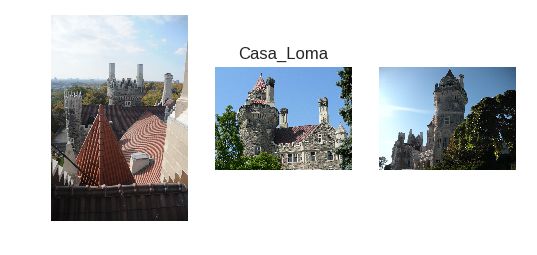

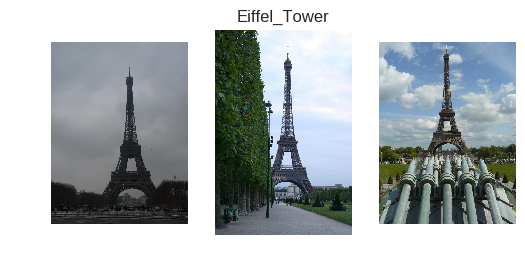

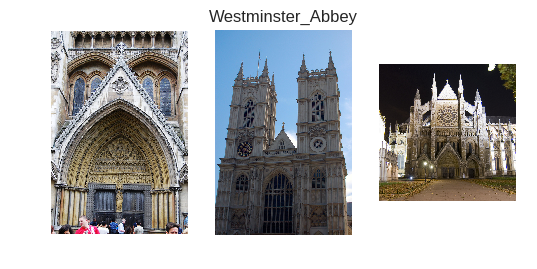

In [0]:
#Sample images from training set
directory=os.listdir('train')
wanted=[]
wanted.append(directory[3])
wanted.append(directory[5])
wanted.append(directory[8])
for each in wanted:
    currentFolder = 'train/' + each
    plt.figure(dpi=100)
    for i, file in enumerate(os.listdir(currentFolder)[7:10]):
        fullpath = "/content/"+ currentFolder +"/"+ file
        img=mpimg.imread(fullpath)
        plt.axis('off')
        axs = plt.subplot(1,3,i+1)
        if(i==1):
          axs.set_title(each.title())
        plt.imshow(img)
        plt.axis('off')


eiffel_tower


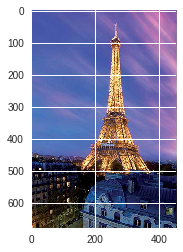

In [239]:
print(predict_landmark("/content/615StV0ULHL._SY679_.jpg",loaded_model))

westminster_abbey


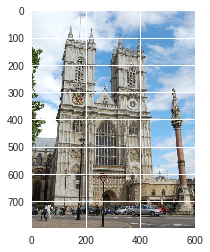

In [240]:
print(predict_landmark("/content/london-westminster-abbey.jpg",loaded_model))

casa_loma


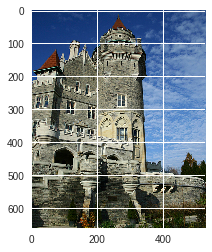

In [241]:
print(predict_landmark("/content/blog-4-2.jpg",loaded_model))

eiffel_tower


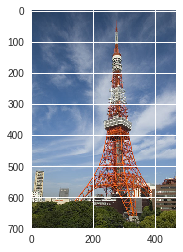

In [242]:
print(predict_landmark("/content/Tokyo+tower.jpg",loaded_model))